In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet


In [5]:
# Load dataset
df = pd.read_csv("/content/advertising.csv")

# Preview dataset
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
# Check basic info
print(df.info())

# Check for nulls
print("\nNulls:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicates:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Describe statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Nulls:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Duplicates: 0


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


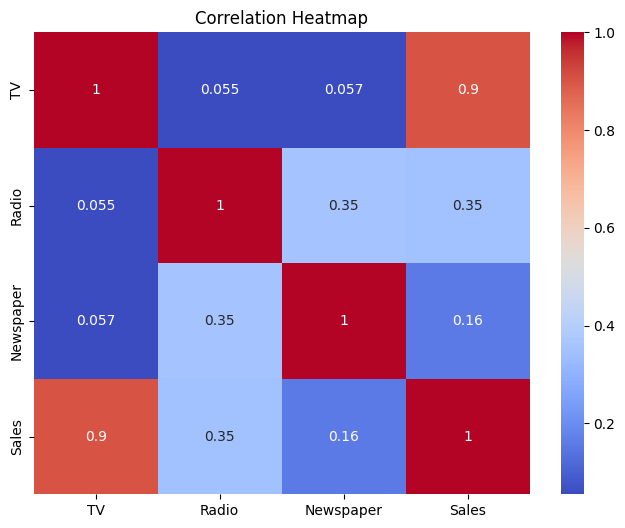

In [7]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# Feature and target split
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]


In [9]:
# Standard scaling applied to all features BEFORE train-test split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all features

# Use scaled features to split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [10]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Metrics function
def print_scores(name, y_true, y_pred):
    print(f"{name} Scores:")
    print("  MSE:", mean_squared_error(y_true, y_pred))
    print("  RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("  MAE:", mean_absolute_error(y_true, y_pred))
    print("  R²:", r2_score(y_true, y_pred))

# Print scores
print_scores("Train", y_train, y_train_pred)
print_scores("Test", y_test, y_test_pred)


Train Scores:
  MSE: 2.6761426537826694
  RMSE: 1.6358920055378563
  MAE: 1.2344160869575869
  R²: 0.9001416005862131
Test Scores:
  MSE: 2.907756910271093
  RMSE: 1.7052146229349234
  MAE: 1.2748262109549346
  R²: 0.9059011844150825


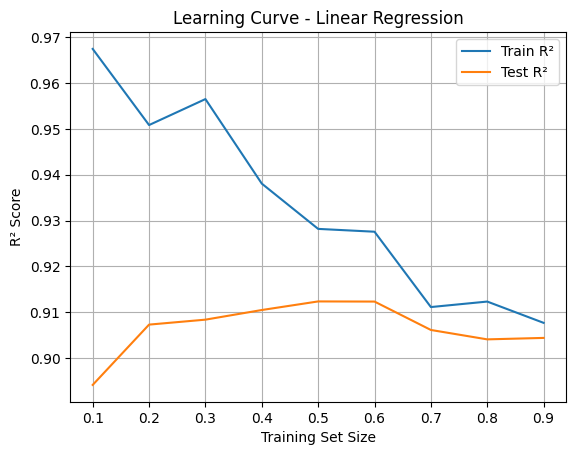

In [11]:
# Learning Curve (Linear Regression)
train_sizes = np.linspace(0.1, 0.9, 9)
train_scores = []
test_scores = []

for size in train_sizes:
    X_t, _, y_t, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    lr.fit(X_t, y_t)
    train_scores.append(r2_score(y_t, lr.predict(X_t)))
    test_scores.append(r2_score(y_test, lr.predict(X_test)))

plt.plot(train_sizes, train_scores, label="Train R²")
plt.plot(train_sizes, test_scores, label="Test R²")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve - Linear Regression")
plt.legend()
plt.grid()
plt.show()


In [12]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_train_ridge = ridge.predict(X_train)
y_test_ridge = ridge.predict(X_test)

print("\nRidge Regression:")
print("Train R2:", r2_score(y_train, y_train_ridge))
print("Test R2:", r2_score(y_test, y_test_ridge))



Ridge Regression:
Train R2: 0.9001065154872058
Test R2: 0.905656968658299


In [13]:
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)

y_train_lasso = lasso.predict(X_train)
y_test_lasso = lasso.predict(X_test)

print("\nLasso Regression:")
print("Train R2:", r2_score(y_train, y_train_lasso))
print("Test R2:", r2_score(y_test, y_test_lasso))


Lasso Regression:
Train R2: 0.9001323171312773
Test R2: 0.9059428116712862


In [14]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
elastic.fit(X_train, y_train)

y_train_elastic = elastic.predict(X_train)
y_test_elastic = elastic.predict(X_test)

print("\nElasticNet Regression:")
print("Train R2:", r2_score(y_train, y_train_elastic))
print("Test R2:", r2_score(y_test, y_test_elastic))


ElasticNet Regression:
Train R2: 0.9001063650732927
Test R2: 0.905723550647914


In [15]:
print("Test MSE (Linear):", mean_squared_error(y_test, y_test_pred))
print("Test MSE (Ridge):", mean_squared_error(y_test, y_test_ridge))
print("Test MSE (Lasso):", mean_squared_error(y_test, y_test_lasso))
print("Test MSE (ElasticNet):", mean_squared_error(y_test, y_test_elastic))


Test MSE (Linear): 2.907756910271093
Test MSE (Ridge): 2.915303445793036
Test MSE (Lasso): 2.9064705822644163
Test MSE (ElasticNet): 2.9132459890737437


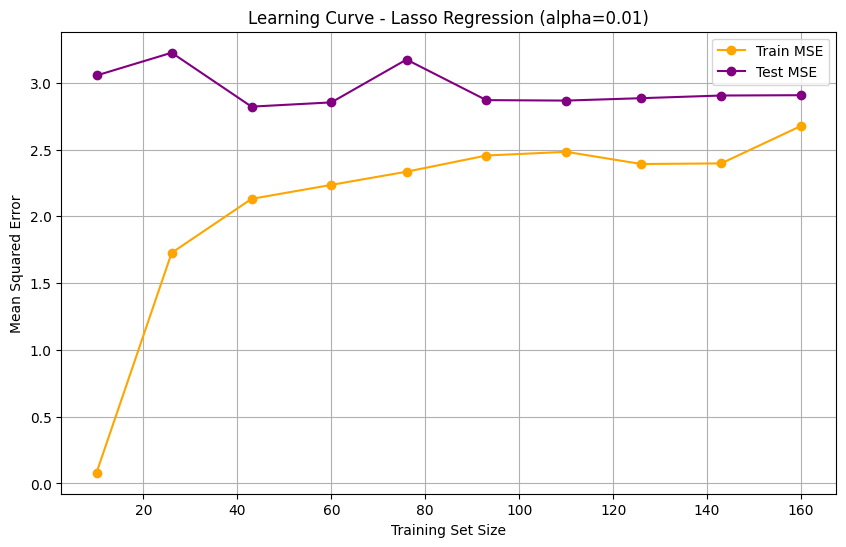

In [16]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

train_sizes = np.linspace(10, len(X_train), 10, dtype=int)

train_errors = []
test_errors = []

for m in train_sizes:
    lasso_model = Lasso(alpha=0.01, max_iter=10000)
    lasso_model.fit(X_train[:m], y_train[:m])

    y_train_pred = lasso_model.predict(X_train[:m])
    y_test_pred = lasso_model.predict(X_test)

    train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, marker='o', label='Train MSE', color='orange')
plt.plot(train_sizes, test_errors, marker='o', label='Test MSE', color='purple')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve - Lasso Regression (alpha=0.01)')
plt.legend()
plt.grid(True)
plt.show()


In [17]:


# Polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


# Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_train_poly_pred = poly_model.predict(X_train_poly)
y_test_poly_pred = poly_model.predict(X_test_poly)

print_scores("Polynomial Train", y_train, y_train_poly_pred)
print_scores("Polynomial Test", y_test, y_test_poly_pred)


Polynomial Train Scores:
  MSE: 1.2409941690013313
  RMSE: 1.1139991781870089
  MAE: 0.8475402868455213
  R²: 0.9536931668335572
Polynomial Test Scores:
  MSE: 10.761513383326633
  RMSE: 3.2804745667855184
  MAE: 1.7202482837634463
  R²: 0.651743355954104


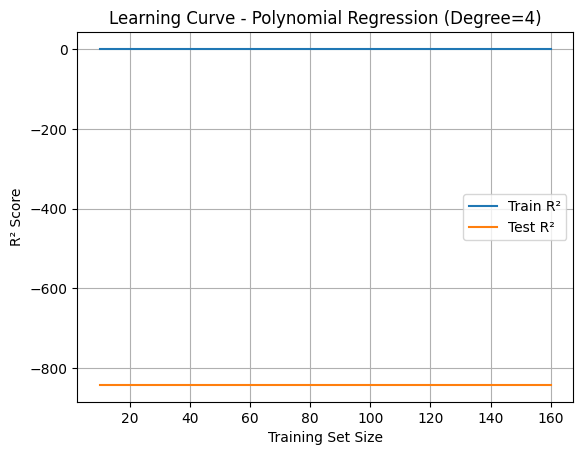

In [20]:
# Learning Curve - Polynomial Regression
train_scores_poly = []
test_scores_poly = []

for size in train_sizes:
    X_t, _, y_t, _ = train_test_split(X_train_poly, y_train, train_size=0.2, random_state=42)
    poly_model.fit(X_t, y_t)
    train_scores_poly.append(r2_score(y_t, poly_model.predict(X_t)))
    test_scores_poly.append(r2_score(y_test, poly_model.predict(X_test_poly)))

plt.plot(train_sizes, train_scores_poly, label="Train R²")
plt.plot(train_sizes, test_scores_poly, label="Test R²")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve - Polynomial Regression (Degree=4)")
plt.legend()
plt.grid()
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler

# Step 1: Scale your X data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline

# Ridge Regression with polynomial features
ridge_poly = make_pipeline(PolynomialFeatures(degree=4), Ridge(alpha=1.0))
ridge_poly.fit(X_train_scaled, y_train)
y_ridge_poly_pred = ridge_poly.predict(X_test_scaled)

# Lasso Regression
lasso_poly = make_pipeline(PolynomialFeatures(degree=4), Lasso(alpha=0.01, max_iter=10000))
lasso_poly.fit(X_train_scaled, y_train)
y_lasso_poly_pred = lasso_poly.predict(X_test_scaled)

# ElasticNet Regression
elastic_poly = make_pipeline(PolynomialFeatures(degree=4), ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000))
elastic_poly.fit(X_train_scaled, y_train)
y_elastic_poly_pred = elastic_poly.predict(X_test_scaled)


In [24]:
from sklearn.metrics import r2_score, mean_squared_error

print("Ridge R2:", r2_score(y_test, y_ridge_poly_pred))
print("Lasso R2:", r2_score(y_test, y_lasso_poly_pred))
print("ElasticNet R2:", r2_score(y_test, y_elastic_poly_pred))

print("Ridge MSE:", mean_squared_error(y_test, y_ridge_poly_pred))
print("Lasso MSE:", mean_squared_error(y_test, y_lasso_poly_pred))
print("ElasticNet MSE:", mean_squared_error(y_test, y_elastic_poly_pred))


Ridge R2: 0.6381192805187255
Lasso R2: 0.7688383633732443
ElasticNet R2: 0.7143965786037461
Ridge MSE: 11.182512300762813
Lasso MSE: 7.143148849567039
ElasticNet MSE: 8.825459884907781


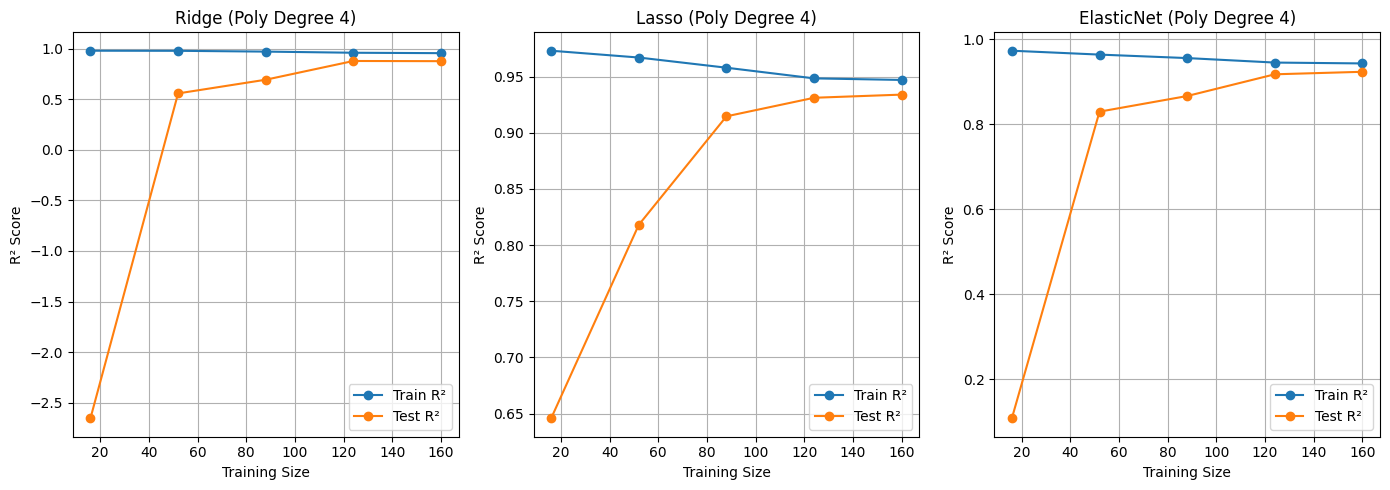

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Load your data
# X = df[["TV", "Radio", "Newspaper"]]
# y = df["Sales"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose model configs
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1, max_iter=5000),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=5000)
}

# Plot learning curves
plt.figure(figsize=(14, 5))
for i, (name, model) in enumerate(models.items(), 1):
    pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=4), model)
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X, y, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.subplot(1, 3, i)
    plt.plot(train_sizes, train_mean, 'o-', label="Train R²")
    plt.plot(train_sizes, test_mean, 'o-', label="Test R²")
    plt.title(f"{name} (Poly Degree 4)")
    plt.xlabel("Training Size")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
